# Example of using the orm classes

Imports

In [1]:
from os import remove
from utils.io import striplog_from_text
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base, LinkIntervalComponentOrm
from striplog import Lexicon, Striplog, Component
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

In [2]:
remove('./tmp_files/test_orm_db_2.db')

Create the db engine and the database structure

In [3]:
engine = create_engine('sqlite:///tmp_files/test_orm_db_2.db', echo=True)

In [4]:
Base.metadata.create_all(engine)

2021-03-11 18:26:11,678 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-03-11 18:26:11,679 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 18:26:11,681 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-03-11 18:26:11,682 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 18:26:11,684 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Boreholes")
2021-03-11 18:26:11,684 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 18:26:11,685 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Boreholes")
2021-03-11 18:26:11,686 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 18:26:11,686 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Positions")
2021-03-11 18:26:11,687 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 18:26:11,688 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Positions")
2021-03-11 18:26:11,689 INFO sqlalchemy.engine.base.Engine ()
2021-03-11

### Create the objects from las files

In [5]:
lexicon = Lexicon.default()

In [6]:
borehole_dict = {'F01':ROOT_DIR+'/data/test.las', 'F02':ROOT_DIR+'/data/test.csv'} # boreholes to insert into the db

In [7]:
int_id = 0
bh_id = 0
pos_id = 0
boreholes = []
components = []
comp_id = 0
component_dict={}
link_dict={}
pos_dict = {}
x = [0., 20.]
y = [0., 120.]

for bh, filename in borehole_dict.items():
    interval_number = 0
    boreholes.append(BoreholeOrm(id=bh))
    
    strip=striplog_from_text(filename)
    
    for c in strip.components:
        if c not in component_dict.keys():
            component_dict.update({c:comp_id})
            comp_id += 1
    d ={}
    for interval in strip:
        top = PositionOrm(id=pos_id, upper=interval.top.upper, 
                          middle=interval.top.middle,  
                          lower=interval.top.lower, 
                          x=x[bh_id], y=y[bh_id])
        
        base = PositionOrm(id=pos_id+1, upper=interval.base.upper, 
                           middle=interval.base.middle,  
                           lower=interval.base.lower, 
                           x=x[bh_id], y=y[bh_id])
        
        d.update({int_id:{'description':interval.description, 
                          'interval_number' : interval_number, 
                          'top': top, 'base': base
                         }})
        
        for i in interval.components:
            if i != Component({}):
                link_dict.update({(int_id, component_dict[i]) : {'extra_data': 'test'}})
        
        interval_number+=1
        int_id += 1
        pos_id += 2

 

    print(d)
    boreholes[bh_id].intervals_values = d
    #boreholes[bh_id].components_values = c
    bh_id += 1 
components = {v:k for k,v in component_dict.items()}

{0: {'description': 'Anhydrite', 'interval_number': 0, 'top': <core.orm.PositionOrm object at 0x7ff5234c5d90>, 'base': <core.orm.PositionOrm object at 0x7ff523833fd0>}, 1: {'description': 'Sandstone, grey, vf-f', 'interval_number': 1, 'top': <core.orm.PositionOrm object at 0x7ff5238330d0>, 'base': <core.orm.PositionOrm object at 0x7ff523833040>}, 2: {'description': 'Anhydrite', 'interval_number': 2, 'top': <core.orm.PositionOrm object at 0x7ff523833070>, 'base': <core.orm.PositionOrm object at 0x7ff523833190>}, 3: {'description': 'Dolomite', 'interval_number': 3, 'top': <core.orm.PositionOrm object at 0x7ff5238331c0>, 'base': <core.orm.PositionOrm object at 0x7ff523833340>}, 4: {'description': 'Anhydrite', 'interval_number': 4, 'top': <core.orm.PositionOrm object at 0x7ff523833370>, 'base': <core.orm.PositionOrm object at 0x7ff5238332b0>}, 5: {'description': 'Sandstone, grey, vf-f', 'interval_number': 5, 'top': <core.orm.PositionOrm object at 0x7ff523833280>, 'base': <core.orm.Position

In [8]:
link_dict

{(0, 1): {'extra_data': 'test'},
 (1, 2): {'extra_data': 'test'},
 (2, 1): {'extra_data': 'test'},
 (3, 3): {'extra_data': 'test'},
 (4, 1): {'extra_data': 'test'},
 (5, 2): {'extra_data': 'test'},
 (6, 4): {'extra_data': 'test'},
 (7, 3): {'extra_data': 'test'},
 (8, 0): {'extra_data': 'test'},
 (9, 3): {'extra_data': 'test'},
 (10, 2): {'extra_data': 'test'},
 (11, 3): {'extra_data': 'test'},
 (12, 2): {'extra_data': 'test'},
 (13, 0): {'extra_data': 'test'},
 (14, 3): {'extra_data': 'test'},
 (15, 0): {'extra_data': 'test'},
 (16, 3): {'extra_data': 'test'},
 (17, 0): {'extra_data': 'test'},
 (18, 3): {'extra_data': 'test'},
 (19, 0): {'extra_data': 'test'},
 (20, 3): {'extra_data': 'test'},
 (21, 0): {'extra_data': 'test'},
 (22, 3): {'extra_data': 'test'},
 (23, 5): {'extra_data': 'test'},
 (25, 1): {'extra_data': 'test'},
 (26, 2): {'extra_data': 'test'},
 (27, 4): {'extra_data': 'test'}}

Create the session

In [9]:
Session = sessionmaker(bind=engine)
session = Session()

Create the project

In [10]:
p = Project(session)
p.add_components(components)

2021-03-11 18:26:11,913 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 18:26:11,917 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 18:26:11,919 INFO sqlalchemy.engine.base.Engine ()
2021-03-11 18:26:11,924 INFO sqlalchemy.engine.base.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-03-11 18:26:11,925 INFO sqlalchemy.engine.base.Engine ((0, 'Siltstone, grey'), (1, 'Anhydrite'), (2, 'Sandstone, vf-f, grey'), (3, 'Dolomite'), (4, 'Siltstone, red'), (5, 'Limestone'))
2021-03-11 18:26:11,931 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 18:26:11,935 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 18:26:11,937 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021

In [11]:
boreholes

[<core.orm.BoreholeOrm>(id=F01, length=None, diameter=None, intervals=25),
 <core.orm.BoreholeOrm>(id=F02, length=None, diameter=None, intervals=3)]

Add boreholes into the database

In [12]:
for bh in boreholes:
    p.add_borehole(bh)

2021-03-11 18:26:11,974 INFO sqlalchemy.engine.base.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-03-11 18:26:11,977 INFO sqlalchemy.engine.base.Engine ((0, 14.3, 14.3, 14.3, 0.0, 0.0), (1, 51.24117647058824, 51.24117647058824, 51.24117647058824, 0.0, 0.0), (2, 51.24117647058824, 51.24117647058824, 51.24117647058824, 0.0, 0.0), (3, 54.81764705882354, 54.81764705882354, 54.81764705882354, 0.0, 0.0), (4, 54.81764705882354, 54.81764705882354, 54.81764705882354, 0.0, 0.0), (5, 56.55882352941177, 56.55882352941177, 56.55882352941177, 0.0, 0.0), (6, 56.55882352941177, 56.55882352941177, 56.55882352941177, 0.0, 0.0), (7, 58.86470588235295, 58.86470588235295, 58.86470588235295, 0.0, 0.0)  ... displaying 10 of 50 total bound parameter sets ...  (48, 131.47647058823532, 131.47647058823532, 131.47647058823532, 0.0, 0.0), (49, 135.9, 135.9, 135.9, 0.0, 0.0))
2021-03-11 18:26:11,980 INFO sqlalchemy.engine.base.Engine INSERT INTO "Boreholes" (id, leng

2021-03-11 18:26:12,136 INFO sqlalchemy.engine.base.Engine (14,)
2021-03-11 18:26:12,140 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 18:26:12,145 INFO sqlalchemy.engine.base.Engine (15,)
2021-03-11 18:26:12,151 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 18:26:12,153 INFO sqlalchemy.engine.base.Engine (16,)
2021-03-11 18:26:12,157 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

2021-03-11 18:26:12,309 INFO sqlalchemy.engine.base.Engine (35,)
2021-03-11 18:26:12,316 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 18:26:12,317 INFO sqlalchemy.engine.base.Engine (36,)
2021-03-11 18:26:12,319 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 18:26:12,320 INFO sqlalchemy.engine.base.Engine (37,)
2021-03-11 18:26:12,325 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

2021-03-11 18:26:12,702 INFO sqlalchemy.engine.base.Engine (51,)
2021-03-11 18:26:12,710 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 18:26:12,713 INFO sqlalchemy.engine.base.Engine (52,)
2021-03-11 18:26:12,716 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-03-11 18:26:12,717 INFO sqlalchemy.engine.base.Engine (53,)
2021-03-11 18:26:12,724 INFO sqlalchemy.engine.base.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positi

In [13]:
p.add_link_between_components_and_intervals(link_dict)

2021-03-11 18:26:12,975 INFO sqlalchemy.engine.base.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-03-11 18:26:12,977 INFO sqlalchemy.engine.base.Engine (6.0, 'F02')
2021-03-11 18:26:12,982 INFO sqlalchemy.engine.base.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-03-11 18:26:12,984 INFO sqlalchemy.engine.base.Engine ((0, 1, 'test'), (1, 2, 'test'), (2, 1, 'test'), (3, 3, 'test'), (4, 1, 'test'), (5, 2, 'test'), (6, 4, 'test'), (7, 3, 'test')  ... displaying 10 of 27 total bound parameter sets ...  (26, 2, 'test'), (27, 4, 'test'))
2021-03-11 18:26:12,987 INFO sqlalchemy.engine.base.Engine COMMIT
2021-03-11 18:26:12,996 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 18:26:12,999 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-03-11 18:26:13,002 INFO sqlalchemy.engin

In [14]:
p.boreholes[0].id

'F01'

In [15]:
p.commit()

2021-03-11 18:26:13,035 INFO sqlalchemy.engine.base.Engine COMMIT


In [16]:
p.boreholes[0].intervals[0].description

2021-03-11 18:26:13,053 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-11 18:26:13,057 INFO sqlalchemy.engine.base.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-03-11 18:26:13,060 INFO sqlalchemy.engine.base.Engine ('F01',)
2021-03-11 18:26:13,063 INFO sqlalchemy.engine.base.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-03-11 18:26:13,066 INFO sqlalchemy.engine.base.Engine ('F01',)


'Anhydrite'

In [17]:
p.boreholes[0].intervals[0]

In [18]:
session.close()

2021-03-11 18:26:13,098 INFO sqlalchemy.engine.base.Engine ROLLBACK


In [19]:
p.plot3d(x3d=True)

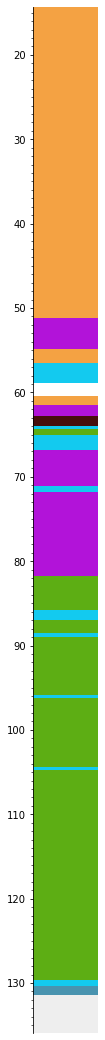

In [20]:
p.boreholes_3d[0].plot()